In [1]:
from sensor import sensor as sens
from actuator import actuator as act
from threshold import threshold as thr
from manager import manager
from signal_input import signal_input
import wire
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = manager(verbose = True)
#Create an input node
sns = sens(mng,(1,1))
#Create threshold nodes
t1 = thr(mng,1)
t2 = thr(mng,2)
t3 = thr(mng,2)
#Create output node/actuator
out = act(mng)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t2,0)
t1.add_consumer(t1,1)
t2.add_consumer(t3,0)
t2.add_consumer(t1,1)
t3.add_consumer(out,0)
sns.add_consumer(t1,0,(0,0))
sns.add_consumer(t2,0,(0,0))
sns.add_consumer(t3,0,(0,0))

In [4]:
#Threshold node names
[t1.name, t2.name, t3.name]

['thr_C7V3', 'thr_ZAQH', 'thr_FZ8F']

In [5]:
#Current node values
mng.get_thresholds()

[0, 0, 0]

In [6]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_C7V3 --> thr_ZAQH with : wire_RWL3
thr_C7V3 --| thr_C7V3 with : wire_BETR
thr_ZAQH --> thr_FZ8F with : wire_07A2
thr_ZAQH --| thr_C7V3 with : wire_JN5D
thr_FZ8F --> act_E2AB with : wire_2MYF


In [7]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='3p_network', directory='3pulse-demo', format='png', cleanup=True)

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_E2AB [color=black style=filled shape=doublecircle label="" width=0.30] thr_C7V3 [label ="1"] thr_ZAQH [label ="2"] thr_FZ8F [label ="2"] thr_C7V3 -> thr_ZAQH [arrowhead="rnormal"] thr_C7V3 -> thr_C7V3 [arrowhead="tee"] thr_ZAQH -> thr_FZ8F [arrowhead="rnormal"] thr_ZAQH -> thr_C7V3 [arrowhead="tee"] thr_FZ8F -> act_E2AB [arrowhead="rnormal"] input_LOJ1 [color=black style=filled shape=circle label="" width=0.25] input_LOJ1 -> thr_C7V3 [arrowhead="rnormal"] input_LOJ1 -> thr_ZAQH [arrowhead="rnormal"] input_LOJ1 -> thr_FZ8F [arrowhead="rnormal"]}


'3pulse-demo\\3p_network.png'

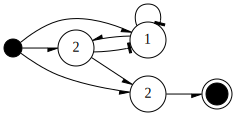

In [8]:
src

In [9]:
print(f"Initial thresholds : \n{mng.get_thresholds()}")

for i in range(3):
    #Send a signal
    sns.feed([[1]])
    #Update
    mng.update()

Initial thresholds : 
[0, 0, 0]
[1]
Thresholds at time 0 after the signal: 
[1, 1, 1]
Threshold outputs at time 0
thr_C7V3 --> wire_RWL3
thr_C7V3 --| wire_BETR
Thresholds at time 0 after threshold update: 
[0, 0, 0]
Wire outputs at time 0
thr_C7V3 --> thr_ZAQH with : wire_RWL3
thr_C7V3 --| thr_C7V3 with : wire_BETR
thr_ZAQH --- thr_FZ8F with : wire_07A2
thr_ZAQH --- thr_C7V3 with : wire_JN5D
thr_FZ8F --- act_E2AB with : wire_2MYF
Thresholds at time 0 after wire update: 
[-1, 1, 0]
[1]
Thresholds at time 1 after the signal: 
[0, 2, 1]
Threshold outputs at time 1
thr_ZAQH --> wire_07A2
thr_ZAQH --| wire_JN5D
Thresholds at time 1 after threshold update: 
[0, 0, 0]
Wire outputs at time 1
thr_C7V3 --- thr_ZAQH with : wire_RWL3
thr_C7V3 --- thr_C7V3 with : wire_BETR
thr_ZAQH --> thr_FZ8F with : wire_07A2
thr_ZAQH --| thr_C7V3 with : wire_JN5D
thr_FZ8F --- act_E2AB with : wire_2MYF
Thresholds at time 1 after wire update: 
[-1, 0, 1]
[1]
Thresholds at time 2 after the signal: 
[0, 1, 2]
Thresh